In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assigning Path
path = r'/Users/elia/Desktop/DATA ANALYST/CAREER FOUNDRY/B - Data Analytics Immersion/4 - PYTHON FOR ANALYSTS/09-2025 Instacart Basket Analysis'

In [3]:
# Import Dataframe

df_instacart = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'instacart_dataset_complete.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_instacart.head(25)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spender_level,order_frequency_median,order_frequency_level,region,customer_activity_level,customer_profile,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-Range Product,Not Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Not Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Very Busy,Not Slow,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,6184,2,1,Clementines,32,4,4.3,Low-Range Product,Very Busy,Not Slow,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,6184,1,1,Clementines,32,4,4.3,Low-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,beverages
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,8617,3,0,Assorted Nuggets,45,19,4.0,Low-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,snacks


In [7]:
df_instacart.groupby('order_hour_of_day')['prices'].sum().sort_values(ascending=False)

order_hour_of_day
10    20527804.2
11    20315206.0
14    20033134.3
15    19791374.1
13    19785688.3
12    19439454.0
16    18828684.5
9     18320180.5
17    15473930.3
8     12922482.5
18    12111382.2
19     9304110.2
20     7260387.3
7      6750581.7
21     5955876.5
22     4744754.1
23     2997909.1
6      2197137.1
0      1625007.5
1       855655.6
5       660968.6
2       512533.9
4       398014.7
3       381978.4
Name: prices, dtype: float64

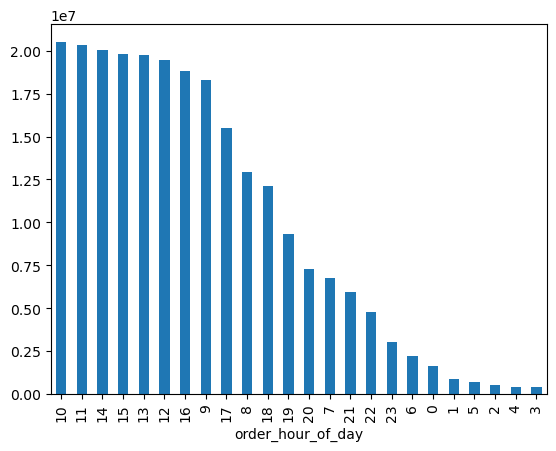

In [8]:
barchart_prices_hours = df_instacart.groupby('order_hour_of_day')['prices'].sum().sort_values(ascending=False).plot(kind='bar')

In [9]:
# Export the Bar Chart

barchart_prices_hours.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'barchart_prices_hours.png'))

In [10]:
df_instacart.describe()

,user_id,age,n_dependants,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_user_price,order_frequency_median
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.029284e+05,4.946803e+01,1.501819e+00,9.967587e+04,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,1.193352e+01,9.957140e+00
std,5.947061e+04,1.848528e+01,1.118896e+00,4.314187e+04,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.992284e+01,6.666137e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
25%,5.140900e+04,3.300000e+01,1.000000e+00,6.729200e+04,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00
50%,1.025860e+05,4.900000e+01,2.000000e+00,9.676500e+04,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00
75%,1.543870e+05,6.500000e+01,3.000000e+00,1.281020e+05,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01


In [6]:
# This will assign a price group label to each product based on their price

df_instacart.loc[df_instacart['prices'] < 5, 'price_range_loc'] = 'Low-Range Product'
df_instacart.loc[(df_instacart['prices'] < 15) & (df_instacart['prices'] >= 5), 'price_range_loc'] = 'Mid-Range Product'
df_instacart.loc[df_instacart['prices'] >= 15, 'price_range_loc'] = 'High-Range Product'

In [7]:
df_instacart.head(25)

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,slowest_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spender_level,order_frequency_median,order_frequency_level,region,customer_activity_level,customer_profile,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-Range Product,Not Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Not Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,Low-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,Mid-Range Product,Not Busy,Very Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-Range Product,Very Busy,Not Slow,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,dairy eggs
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,6184,2,1,Clementines,32,4,4.3,Low-Range Product,Very Busy,Not Slow,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,6184,1,1,Clementines,32,4,4.3,Low-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,produce
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,beverages
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,8617,3,0,Assorted Nuggets,45,19,4.0,Low-Range Product,Very Busy,Not Slow,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer,Midwest,High Activity,Old Parent Shopper,snacks


In [8]:
df_instacart['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-Range Product     21014552
Low-Range Product      9459067
High-Range Product      486068
High-range product        4877
Name: count, dtype: int64

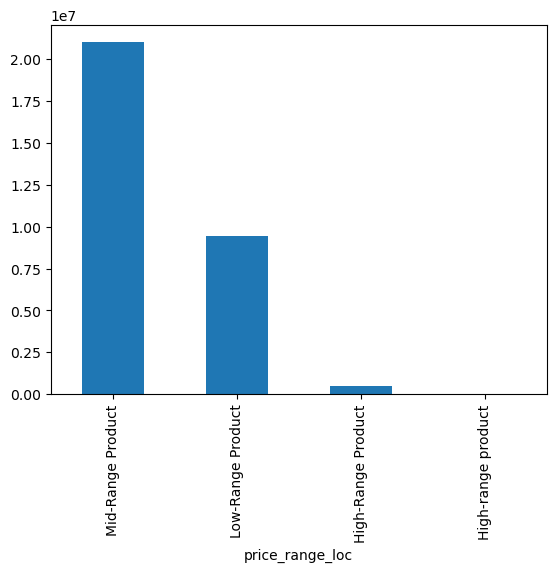

In [14]:
instacart_barchart_price_groups = df_instacart['price_range_loc'].value_counts(dropna=False).plot(kind='bar')

In [14]:
# Export the Bar Chart

instacart_barchart_price_groups.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'instacart_barchart_price_groups.png'))

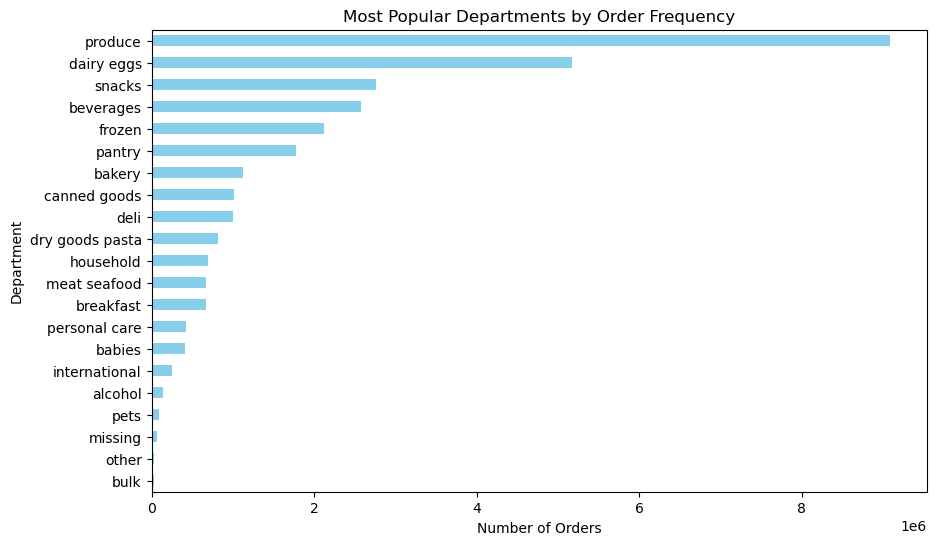

In [15]:
instacart_barchart_departments = df_instacart['department'].value_counts().sort_values(ascending=True).plot(
    kind='barh', figsize=(10,6), color='skyblue'
)
plt.title('Most Popular Departments by Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()


In [20]:
# Export the Bar Chart

instacart_barchart_departments.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'instacart_barchart_departments.png'))

In [21]:
df_instacart['loyalty_flag'].value_counts(normalize=True) * 100

loyalty_flag
Regular customer    51.274018
Loyal customer      33.212459
New customer        15.513524
Name: proportion, dtype: float64

In [22]:
df_instacart.groupby('loyalty_flag')['order_frequency_median'].mean().round(1)

loyalty_flag
Loyal customer       5.2
New customer        18.0
Regular customer    10.6
Name: order_frequency_median, dtype: float64

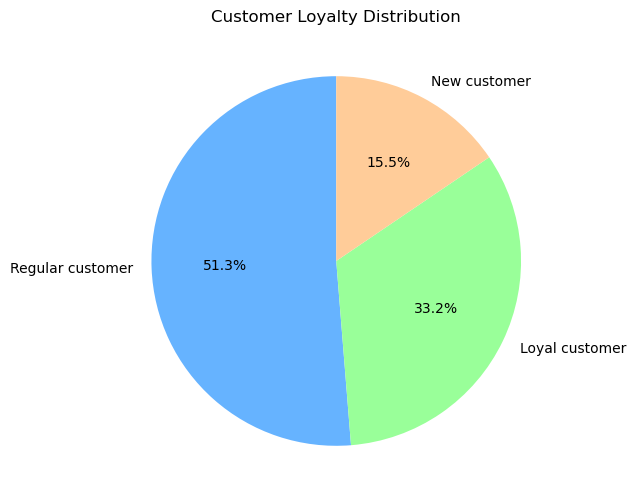

In [23]:
import matplotlib.pyplot as plt

loyalty_counts = df_instacart['loyalty_flag'].value_counts(normalize=True) * 100

# Create pie chart
pie_chart_loyalty = plt.figure(figsize=(6,6))
plt.pie(
    loyalty_counts,
    labels=loyalty_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#99ff99','#ffcc99']
)
plt.title('Customer Loyalty Distribution')
plt.show()

In [24]:
# Export the Pie Chart

pie_chart_loyalty.figure.savefig(os.path.join(path, '04 - Analysis', 'Visualizations', 'pie_chart_loyalty.png'))

In [25]:
df_instacart.groupby('loyalty_flag')['avg_user_price'].mean().sort_values(ascending=False)

loyalty_flag
New customer        13.387725
Regular customer    12.495717
Loyal customer      10.386336
Name: avg_user_price, dtype: float64

In [26]:
df_instacart.groupby('loyalty_flag')['order_hour_of_day'].mean().sort_values(ascending=False)

loyalty_flag
New customer        13.657060
Regular customer    13.480738
Loyal customer      13.188346
Name: order_hour_of_day, dtype: float64

In [27]:
df_instacart.groupby('loyalty_flag')['order_frequency_median'].mean().sort_values(ascending=False)

loyalty_flag
New customer        18.037059
Regular customer    10.612951
Loyal customer       5.170559
Name: order_frequency_median, dtype: float64

### Are there differences in ordering habits based on a customer’s region?

In [28]:
df_instacart.groupby('region')['avg_user_price'].mean().sort_values(ascending=False)

region
Midwest      12.681835
South        12.118845
Northeast    11.542582
West         11.276491
Name: avg_user_price, dtype: float64

In [29]:
df_instacart.groupby('region')['order_hour_of_day'].mean().sort_values(ascending=False)

region
Midwest      13.429114
Northeast    13.410177
West         13.404618
South        13.403529
Name: order_hour_of_day, dtype: float64

In [30]:
df_instacart.groupby('region')['order_frequency_median'].mean().sort_values(ascending=False)

region
Midwest      10.019931
South         9.955835
Northeast     9.924985
West          9.923485
Name: order_frequency_median, dtype: float64

In [32]:
df_instacart.groupby('region')['order_day_of_week'].mean().sort_values(ascending=False)

region
South        2.743692
Midwest      2.741556
West         2.740643
Northeast    2.737948
Name: order_day_of_week, dtype: float64

### Is there a connection between age and family status in terms of ordering habits?

In [35]:
df_instacart.groupby(['age', 'n_dependants'])['order_frequency_median'].mean().sort_values(ascending=False)

age  n_dependants
58   1               10.847314
51   2               10.763412
74   2               10.735852
32   3               10.642769
26   0               10.626413
                       ...    
69   1                9.301353
48   1                9.253426
31   0                9.205962
23   3                9.088803
58   0                9.080499
Name: order_frequency_median, Length: 256, dtype: float64

In [37]:
df_instacart.groupby(['age', 'n_dependants'])['avg_user_price'].mean().sort_values(ascending=False)

age  n_dependants
45   0               34.093789
57   1               31.139113
28   3               29.618574
21   0               26.885026
38   2               26.425863
                       ...    
58   0                8.230814
62   1                8.229271
44   3                8.203352
36   1                8.076273
19   2                7.941135
Name: avg_user_price, Length: 256, dtype: float64

### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_1650/1280536621.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barchart_age_groups = sns.countplot(x='age_group', data=df_instacart, palette='Blues')


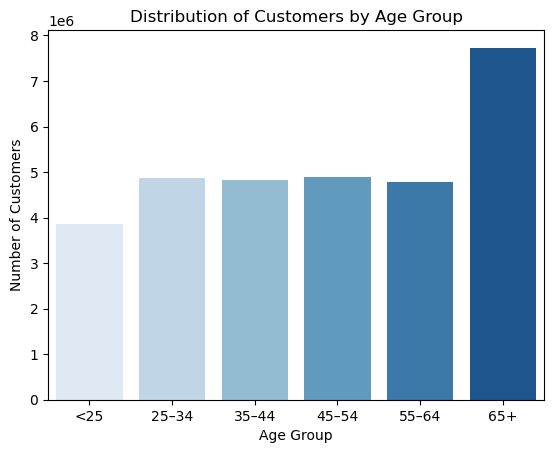

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65+']
df_instacart['age_group'] = pd.cut(df_instacart['age'], bins=bins, labels=labels)

# Plot
barchart_age_groups = sns.countplot(x='age_group', data=df_instacart, palette='Blues')
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

In [42]:
# Export the Bar Chart

barchart_age_groups.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'barchart_age_groups.png'))

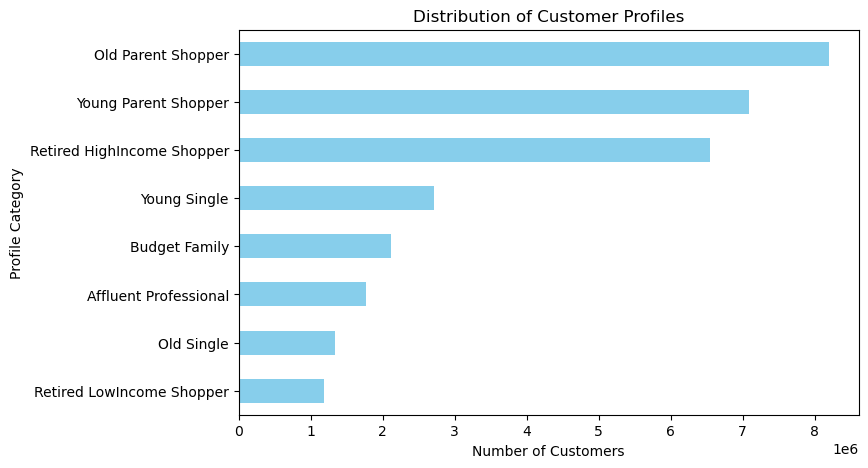

In [43]:
barchart_customer_profiles = df_instacart['customer_profile'].value_counts().sort_values(ascending=True).plot(
    kind='barh', figsize=(8,5), color='skyblue'
)
plt.title('Distribution of Customer Profiles')
plt.xlabel('Number of Customers')
plt.ylabel('Profile Category')
plt.show()

In [44]:
# Export the Bar Chart

barchart_customer_profiles.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'barchart_customer_profiles.png'))

### What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [17]:
df_instacart.groupby('customer_profile')['avg_user_price'].mean().sort_values(ascending=False)

customer_profile
Affluent Professional         18.030714
Young Parent Shopper          12.964608
Retired HighIncome Shopper    12.723098
Old Parent Shopper            12.260972
Young Single                   9.911768
Old Single                     8.782921
Budget Family                  7.088205
Retired LowIncome Shopper      6.898086
Name: avg_user_price, dtype: float64

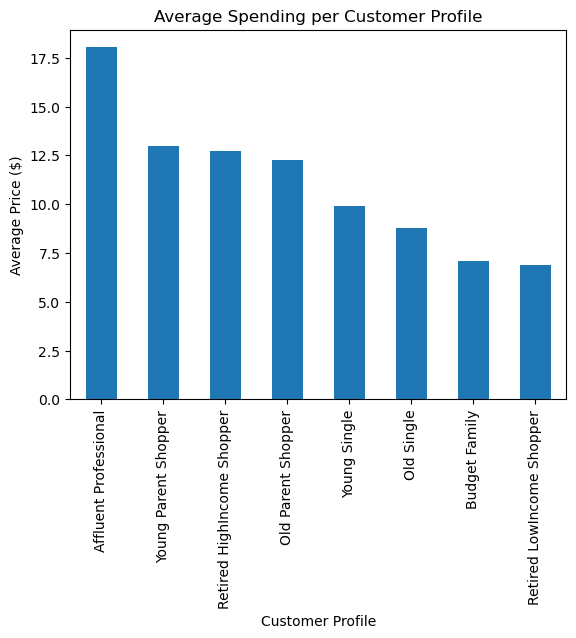

In [19]:
barchart_customer_profiles_price = df_instacart.groupby('customer_profile')['avg_user_price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Spending per Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Average Price ($)')
plt.show()

In [20]:
# Export the Bar Chart

barchart_customer_profiles_price.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'barchart_customer_profiles_price.png'))

In [18]:
df_instacart.groupby('customer_profile')['order_frequency_median'].mean().sort_values(ascending=False)

customer_profile
Budget Family                 10.340496
Retired LowIncome Shopper     10.287120
Young Single                  10.046369
Old Parent Shopper             9.954538
Old Single                     9.916470
Young Parent Shopper           9.878522
Retired HighIncome Shopper     9.874363
Affluent Professional          9.804603
Name: order_frequency_median, dtype: float64

In [16]:
crosstab = pd.crosstab(df_instacart['customer_profile'], df_instacart['department'])

# Get top 3 departments for each profile
top3_department = crosstab.apply(lambda row: row.sort_values(ascending=False).head(3).index.tolist(), axis=1)

top3_department

customer_profile
Affluent Professional         [produce, dairy eggs, beverages]
Budget Family                    [produce, dairy eggs, snacks]
Old Parent Shopper            [produce, dairy eggs, beverages]
Old Single                       [produce, dairy eggs, snacks]
Retired HighIncome Shopper    [produce, dairy eggs, beverages]
Retired LowIncome Shopper        [produce, dairy eggs, snacks]
Young Parent Shopper             [produce, dairy eggs, snacks]
Young Single                     [produce, dairy eggs, snacks]
dtype: object

In [24]:
# Export data to pkl

df_instacart.to_pickle(os.path.join(path, '02 - Data','Prepared Data', 'instacart_dataset_complete.pkl'))